# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import dataframe_image as dfi

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [4]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [5]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
total_rides_city = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_city


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
total_drives_city = city_data_df.groupby("type").sum()["driver_count"]

total_drives_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
total_fares_city = pyber_data_df.groupby("type").sum()["fare"]
total_fares_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = pyber_data_df.groupby("type").sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = pyber_data_df.groupby("type").sum()["fare"]/city_data_df.groupby("type").sum()["driver_count"]
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#types = pyber_data_df["type"].unique()
pyber_data_df.set_index("type")
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
#  6. Create a PyBer summary DataFrame. 
#pyber_Summary_df.set_index("type")

Pyber_Summary_df =  pd.DataFrame({"Total Rides": total_rides_city,
                                  "Total Drivers": total_drives_city,
                                    "Total Fares": total_fares_city,
                                    "Average Fare per Ride": average_fare_ride,
                                    "Average Fare per Driver": average_fare_driver}) 
Pyber_Summary_df 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
Pyber_Summary_df.index.name = None
Pyber_Summary_df  

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
#  8. Format the columns.

Pyber_Summary_df["Total Fares"] = Pyber_Summary_df["Total Fares"].map("${:,.2f}".format)

Pyber_Summary_df["Average Fare per Ride"] = Pyber_Summary_df["Average Fare per Ride"].map("{:.2f}".format)

Pyber_Summary_df["Average Fare per Driver"] = Pyber_Summary_df["Average Fare per Driver"].map("{:.2f}".format)

Pyber_Summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",34.62,55.49
Suburban,625,490,"$19,356.33",30.97,39.50
Urban,1625,2405,"$39,854.38",24.53,16.57


In [15]:
# save dataframe as png
dfi.export(Pyber_Summary_df , 'analysis/Pyber_Summary_df.png')

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(['type','date']).sum()[['fare']]
type_date_df.tail(10)

fare
type  date                      
Urban 2019-05-07 17:27:48   6.39
      2019-05-07 20:05:15  24.20
      2019-05-07 20:22:19  18.74
      2019-05-08 01:54:18  32.69
      2019-05-08 02:31:25  41.33
      2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date_df = type_date_df.reset_index()
type_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
type_date_pivot = type_date_df.pivot(index="date", columns ="type", values="fare")
type_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [20]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April_df = type_date_pivot.loc['2019-01-01':'2019-04-28']
fares_Jan_April_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_Jan_April_df.index = pd.to_datetime(fares_Jan_April_df.index)
fares_Jan_April_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [22]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [23]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_Jan_April_df.resample("W").sum()
weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


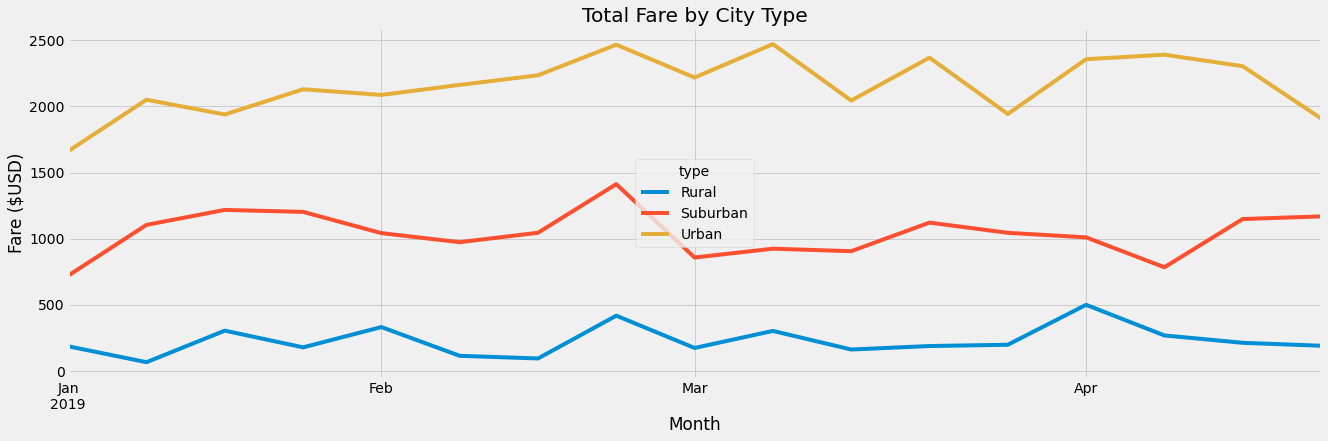

<Figure size 432x288 with 0 Axes>

In [24]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fares = weekly_fares_df.plot(figsize = (20,6))
# Add a title 
weekly_fares.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel("Month")
weekly_fares.set_ylabel("Fare ($USD)")
# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")
# Show the plot
plt.show()
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

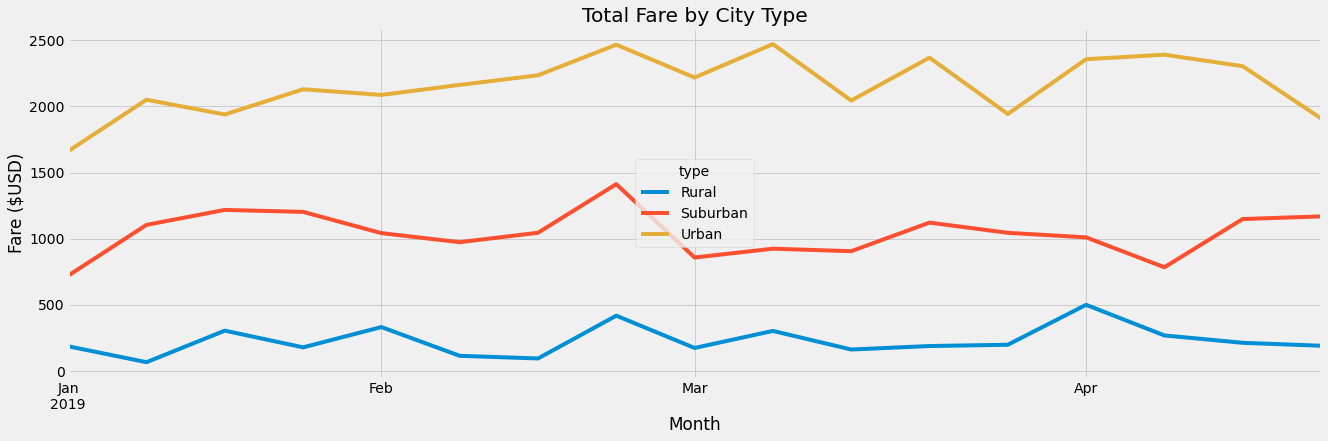

<Figure size 432x288 with 0 Axes>

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create the plot with ax.plt()

fig = plt.figure()
#fig , ax = plt.figure()

ax = weekly_fares_df.plot(figsize = (20,6))

# Add a title 
ax.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary1.png")
# Show the plot
plt.show()
plt.tight_layout()

In [26]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

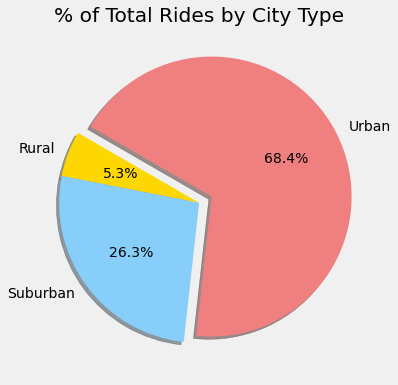

<Figure size 432x288 with 0 Axes>

In [27]:
# Build percentage of rides by city type pie chart.
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Figrides.png")
# Show Figure
plt.show()
plt.tight_layout()

In [28]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents


type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

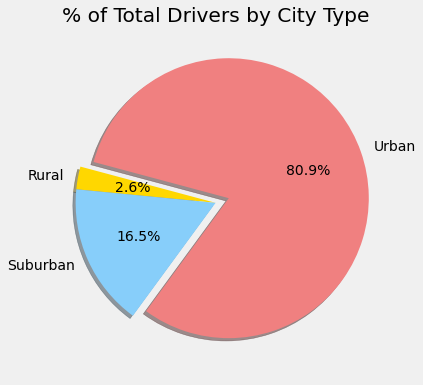

In [29]:
# Build percentage of rides by city type pie chart.

plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/Figdrivers.png")
# Show Figure
plt.show()